# Part II - ((Dataset Exploration Ford GoBike System Data)
## by (Rania MEKRAZI)


## Investigation Overview
>For the presentation, I primarily focused on the effects of gender and user type on trip duration. These variables are selected for presentations because they showed clear relationship without ambiguity. I will start by showing the distribution of the trip duration variable after log transformation. I will then introduce the categorical variables, one by one to get insights into the relationship between each of the categorical variable and trip duration. The relationship will be polished using box plots and clustered bar chart.


## Dataset Overview

> The data consisted of trip duration and attributes of approximately 183412 bike riders. The attributes included 16 features as well as other additional variables such as age, start day and end day. After removing observations with missing values, the data contained 174115 bike riders.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
ford = pd.read_csv('201902-fordgobike-tripdata.csv')
ford.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
#make a copy of the data to avoid altering the original dataset
ford_clean = ford.copy()

In [4]:
ford.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [5]:
# fixing the dtypes problems.
ford_clean.start_time = pd.to_datetime(ford_clean.start_time)
ford_clean.end_time = pd.to_datetime(ford_clean.end_time)
ford_clean['start_station_id'] = pd.to_numeric(ford_clean['start_station_id'], errors='err').fillna(0).astype(int)
ford_clean['end_station_id'] = pd.to_numeric(ford_clean['end_station_id'], errors='err').fillna(0).astype(int)
ford_clean['bike_id'] = pd.to_numeric(ford_clean['bike_id'], errors='err').fillna(0).astype(int)
ford_clean['member_birth_year'] = pd.to_numeric(ford['member_birth_year'], errors='err').fillna(0).astype(int)
ford_clean['bike_share_for_all_trip'] = ford_clean['bike_share_for_all_trip'].astype('bool')

##convert start_time to hours, days, month and year
ford_clean['start_day'] = ford_clean['start_time'].dt.day_name()
ford_clean['start_month'] = ford_clean['start_time'].dt.month_name()

##convert end_time to hours, days, month and year

ford_clean['end_day'] = ford_clean['end_time'].dt.day_name()
ford_clean['end_month'] = ford_clean['end_time'].dt.month_name()




In [6]:
#drop missed data
ford_clean = ford_clean.drop(ford_clean[(ford_clean['user_type'] == 'Subscriber') & (ford_clean['member_birth_year'].isnull())].index)
ford_clean = ford_clean.drop(ford_clean[(ford_clean['user_type'] == 'Subscriber') & (ford_clean['member_gender'].isnull())].index)
# first, drop customers with member_gender &member_birth_year
ford_clean[(ford_clean['user_type'] == 'Customer') & (ford_clean['member_birth_year'].notnull())]
ford_clean[(ford_clean['user_type'] == 'Customer') & (ford_clean['member_gender'].notnull())]
# drop 
ford_clean = ford_clean.drop(ford_clean[(ford_clean['user_type'] == 'Customer') & (ford_clean['member_birth_year'].isnull())].index)
ford_clean = ford_clean.drop(ford_clean[(ford_clean['user_type'] == 'Customer') & (ford_clean['member_gender'].isnull())].index)

In [7]:
#calculate the age of the participants when this trip started. 
ford_clean['age']=(2022-ford_clean.member_birth_year)
#The data set has columns that are not needed to this analysis
ford_clean = ford_clean.drop(ford_clean[(ford_clean['age'] > 70)].index)
ford_clean['age'].describe()


count    174115.000000
mean         36.944433
std           9.560328
min          21.000000
25%          30.000000
50%          35.000000
75%          42.000000
max          70.000000
Name: age, dtype: float64

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

> ### The distribution of the trips during the week
In this graphe we will show the distribution of the trip during the week from Monday to Sunday 

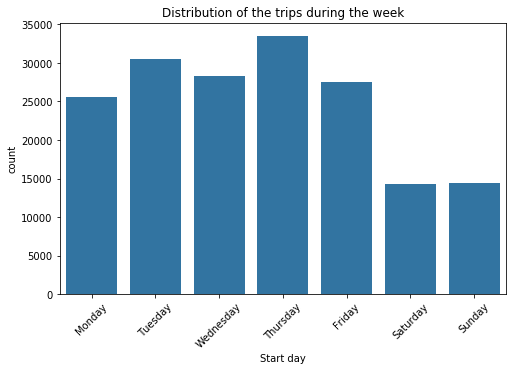

In [8]:
plt.figure(figsize=[8, 5])
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
base_color = sb.color_palette()[0]
sb.countplot(data = ford_clean, x = 'start_day', color = base_color, order = weekdays)
plt.xticks(rotation = 45)
plt.xlabel('Start day')
plt.title('Distribution of the trips during the week');

> Conclusion

>1- Use of bikeshare decreases on the weekend (Saturday and Sunday).

>2- The highest usage of bikeshare is on Thursday.

> ### The distrubution of trip duration

The trip duration variables assumes a wide range of values ranging from 0 to 80,000 seconds. However, when plotted on a logarithmic scale, the distribution is unimodal with peaks between 200 and 1000 seconds.

In [9]:
# to simplify the duration_sec, I'll convert it from seconds to minutes.
ford_clean.insert(loc=1, column='duration_min', value= ford_clean['duration_sec'] / 60)


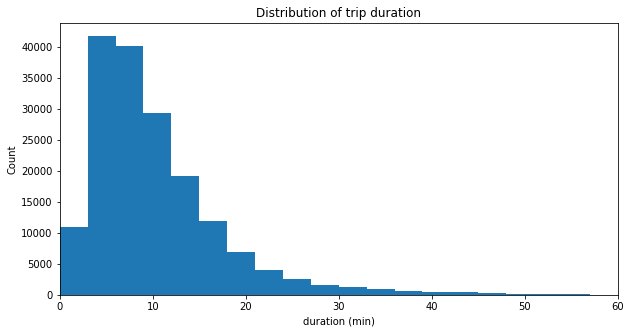

In [10]:
bins= np.arange(0, 60, 3)
plt.figure(figsize=(10, 5))
plt.hist(data=ford_clean, x = 'duration_min', bins=bins)
plt.xlim(0, 60)
plt.title('Distribution of trip duration')
plt.ylabel('Count')
plt.xlabel('duration (min)')
plt.show()

> Conclusion:
>The majority of the trip duration is is around 10 minutes then it begins to decrease. Trips that longer than 30 minutes are not frequent.

> ### Trip duartion across user type in different days

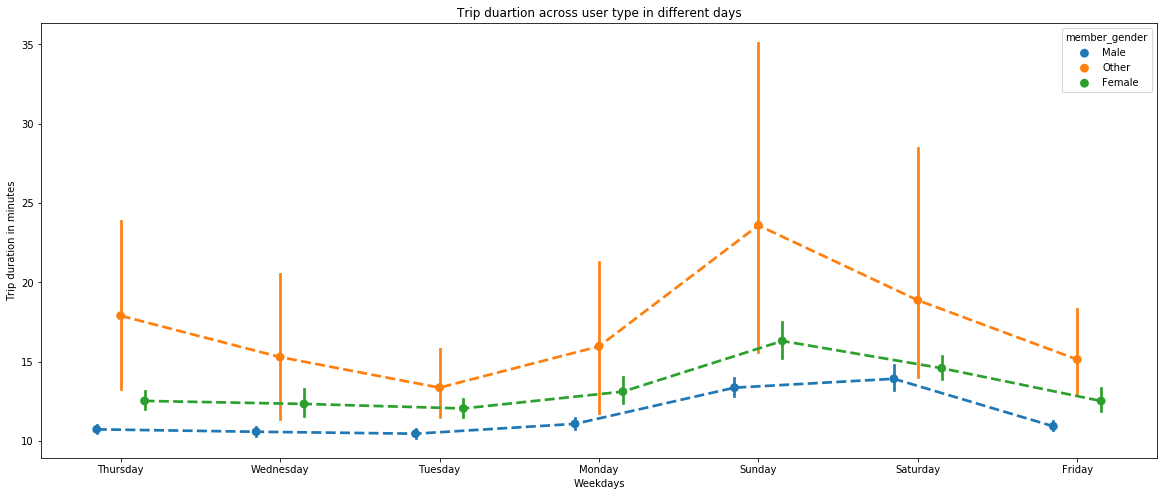

In [11]:
fig = plt.figure(figsize = [20,8])
sb.pointplot(data = ford_clean, x = 'start_day', y = 'duration_min', hue = 'member_gender', dodge = 0.3, linestyles = "--")
plt.title('Trip duartion across user type in different days')
plt.ylabel('Trip duration in minutes')
plt.xlabel('Weekdays')
plt.show();

>Conclusion:  females ride longer trips than males, and trip duration for member gender other is the longest.

### Generate Slideshow
Once you're ready to generate your slideshow, use the jupyter nbconvert command to generate the HTML slide show.

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 380629 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/